# Module 3: Discrete distributions

## Outline

* Some particular discrete distributions and their application in Earth Sciences
    - Hypergeometric distribution
    - Bernoulli trials
        - Binomial distribution 
    - Poisson process and distribution


## Motivation

So far, we have mostly dealt with histrograms of observations and used them as **empirical probability distributions**.

However, you may have a variable in your model for which **you don't have actual data** and cannot derive from first principles (e.g. physical processes). It may be that our variable would be too complex to model, or we simply don't have a model for it. Hopefully, however, you have some information on this variable, and perhaps that comes in the form of a **distribution**. The distribution then, is simply the description of the probability of observation for that variable.

**Parametric distributions** are idealizations of real data and so are theoretical constructs or abstractions:
* they only have few parameters instead of n observations (compactness)
* they will represent real data only approximately
* they can be used for interpolation (gap filling) and extrapolations (describing extreme values or "as-yet-unobserved behavior")

There are some distributions that are well known and used often to help us describe a random variable of interest. The usefulness of the distribution stems from the following reasons: (1) The function is the result of an underlying physical process and is **derived on the basis of certain physically reasonable assumptions**; (2) the function is the result of some limiting process; and (3) it is widely known and the necessary statistical information is available.

For now, let us talk about **discrete distributions** that describe random variables (the data of interest) that can take on only particular values.

### Types of questions you may encounter

> On average, 1.7 hurricanes make landfall in the US every year. What's the probability of no hurricanes in a year?

> Cayuga Lake in NY states has frozen 10 times in the last 230 years. What's the probability that the lake freezes at least once in 10 years?

## Hypergeometric distribution

We use the hypergeometric function when selecting values from a **finite population** with **binary values** (for example "good" and "bad"), without replacement.

What is the probability of getting $x$ successes in $n$ trials?

*For example: Historical data show that there are 10 rainy days in June in Uppsala. What is the probability of 4 rainy days in 7 randomly selected days in Uppsala in June?*

Let:
* $N$ be the total number of objects, i.e. the size of the population
* $n$ be the number of times you draw from the population, i.e. the total number of trials (the sample size)
* $k$ be the total number of Type I objects ("good" or "success") in the population, or you could think of objects with a certain property.
* The random variable $x$ be the number of successes in $n$ samples drawn without replacement from the total population
  
  
Assumptions for hypergeometric distribution | 
------------ |
1. There is a population of $N$ items divided into two groups (success or failure), $k$ of which are belonging to one group and $N-k$ belong to the other group.|
2. A random sample (without replacement) of $n$ items is taken from the $N$ items.|
3. Probability of getting $x$ successes in $n$ trials; which is given by $f_x(x; N, n, k)$|
  
  
The total number of ways of selecting a sample of size n from N (unordered, without replacement) is the binoial coeffecient:

$$ \binom{N}{n} \equiv \frac{N!}{n! (N - n)!}$$

Deviding the number of ways of selecting *x successes* (and n-x failures) by the total number of ways of selecting a sample of $n$, the probability mass function becomes:

$$f_x(x; N,n,k) = {\binom k x \binom{N-k}{n-x} \over \binom N n }$$

* this probability mass function is defined for:

$$x \in [\max(0, n - N + k), \min(k, n)]$$


The cumulative distribution function that is defined as:

$$F_x(x; N,n,k) ={ \sum_{i=0}^x \binom k i \binom{N-k}{n-i}\over\binom N n }$$


The $E(x)$, or **expected value** is given by:

$$ E(x) = {n \cdot k\over N}$$


The **variance** is given by:

$$Var(x) ={ n \cdot k(N-k)(N-n)\over N^2 \cdot (N-1)}$$


### Example: Rainy days in Uppsala
*Note this is compendium example 3.1*

Historical data show that there are 10 rainy days in June in Uppsala. Assume the rainy days are independent (*is this a fair assumption?*). You want to go to the field for a week to measure rainfall intensity.

a. What is the probability of 4 rainy days in 7 randomly selected days in June?


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import hypergeom

help(hypergeom)

Help on hypergeom_gen in module scipy.stats._discrete_distns object:

class hypergeom_gen(scipy.stats._distn_infrastructure.rv_discrete)
 |  A hypergeometric discrete random variable.
 |  
 |  The hypergeometric distribution models drawing objects from a bin.
 |  `M` is the total number of objects, `n` is total number of Type I objects.
 |  The random variate represents the number of Type I objects in `N` drawn
 |  without replacement from the total population.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The symbols used to denote the shape parameters (`M`, `n`, and `N`) are not
 |  universally accepted.  See the Examples for a clarification of the
 |  definitions used here.
 |  
 |  The probability mass function is defined as,
 |  
 |  .. math:: p(k, M, n, N) = \frac{\binom{n}{k} \binom{M - n}{N - k}}
 |                                 {\binom{M}{N}}
 |  
 |  for :math:`k \in [\max(0, N - M + n), \min(n, N)]`, where the binomial
 |  coefficients are defined as,
 |  
 |  .. 

<IPython.core.display.Javascript object>


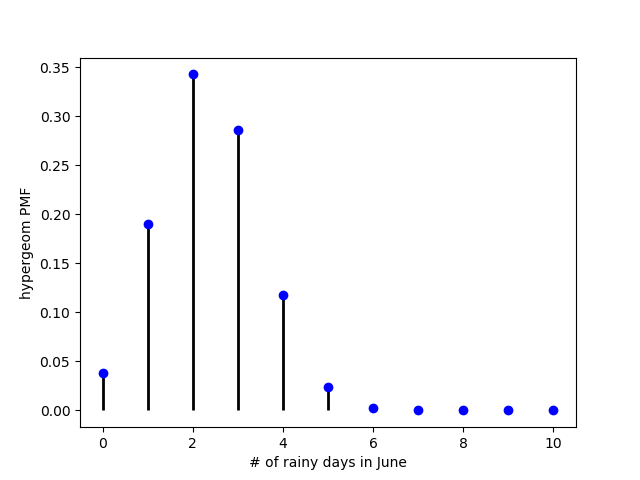

0.11759504862953113


In [3]:
[N, k, n] = [30, 10, 7]

rv = hypergeom(N, k, n)
x = np.arange(0, k+1)
f_x = rv.pmf

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, f_x(x), 'bo')
ax.vlines(x, 0, f_x(x), lw=2)

ax.set_xlabel('# of rainy days in June')
ax.set_ylabel('hypergeom PMF')

print(f_x(4))

<IPython.core.display.Javascript object>


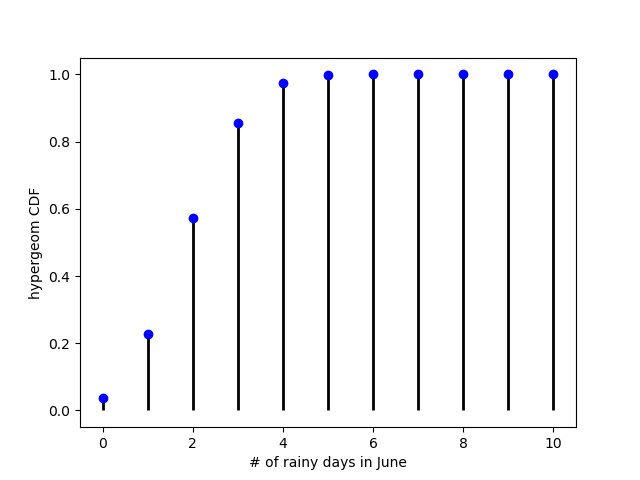

0.8567639257294422


In [4]:
# b. What is the probability that less than 4 of these randomly selected days are rainy?

F_x = rv.cdf #cumulative distribution

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, F_x(x), 'bo')
ax.vlines(x, 0, F_x(x), lw=2)
ax.set_xlabel('# of rainy days in June')
ax.set_ylabel('hypergeom CDF')

# Note that we asked, **less than 4**, so we have to look at the CDF=3
print(F_x(3))

## Now with replacement: Bernoulli trials

When we are considering sequences of events that *may* or *may not* occur, such as, for example, the annual maximum flow of a river exceeding a certain specified flood level, then we can consider each event in the sequence **a trial**. In general, there will be only two outcomes, and we consider this a Bernoulli process if **the probability of every trial is the same** (i.e., does not depend on past history).

Note that if we consider the exceedence of a flood level, we are considering *the maximum discharge over the year* against the specific level. That is, our trial occurrs once per year and we are going to ask, "What is the probability of the maximum discharge for the year exceeding the flood level?". We are not considering whether at any time, the river will exceed the specified level -- this is a different question.

The *Bernoulli sequence*, named after [James Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli) is one of the simplest but most important random processes in probability.
Our **Bernoulli sequence** is a model that is based on the following assumptions:

1. Each trial has only two possible outcomes: the *occurrence* or *non-occurrence* of an event.
2. The probability of occurrence of the event in each trial is constant.
3. The trials are statistically independent (no memory).

In our example, we're assuming then that the likelyhood of the river's maximum discharge exceeding the specified flood level from one year to the next is independent, and each year the probability of exceeding the flood level is constant, then *the annual maximum floods over a series of years* constitutes a *Bernoulli sequence*.


### Recognising binomial random variables

> **Question:** On a Friday night, a highway patrol officer sets up a roadblock and stops 100 drivers. A given driver is considered a success if he or she is wearing a seat belt; the driver is considered a failure otherwise. Can we consider this experiment a binomial experiment (Bernoulli sequence)?
* (a) Yes
* (b) No

There are a few distributions that we use to work with the Bernoulli sequence. The main ones are the **binomial** distribution, the **geometric** distribution, and the **negative binomial** distribution (which we will skip here). To understand how these are used, it is best to understand the underlying assumptions for each type of distribution.


### Binomial distribution

Assumptions for binomial distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. Probability of getting $x$ successes (elements with property $k$) in $n$ trials? |

The $p.m.f.$ has the general form:

$$f_x(x; n, p) = \binom n x p^x q^{n-x}$$

Where $x$ is the number of successes, $n$ is the number of trials, and $p$ is the probability of one success, and $q=1-p$. 

The $c.d.f.$ has the form:
    
$$F_x(x; n,p) = \sum_{i=0}^x \binom n i p^i q^{n-i}$$
    
The $E(x)$ is given by:

$$ E(x) = np$$

and:

$$Var(x) =npq$$

We can also calculate a **coefficient of skewness**:

$$\gamma_x = {p-q\over \sqrt{npq}}$$



* Given a sample, we can fit a distribution by equating the sample moments and these distribution (or population) moments (i.e. the method of moments, cf. module 10)

### Balls in a box
*Note this is compendium example 3.6*

A box contains 1000 balls, of which 200 are red balls. Let's perform an experiment in such a way that each time a ball is taken from the box at random, its color is observed and then the ball is put back (*replacement!*). What is the probability of getting 10 red balls in the 100 trials?


In [5]:
from scipy.stats import binom
#help(binom)

In [6]:
n, p = 100, 200/1000.
x = 10

f_x = binom(n, p).pmf

print(f_x(x))

0.003362819969582627


<IPython.core.display.Javascript object>


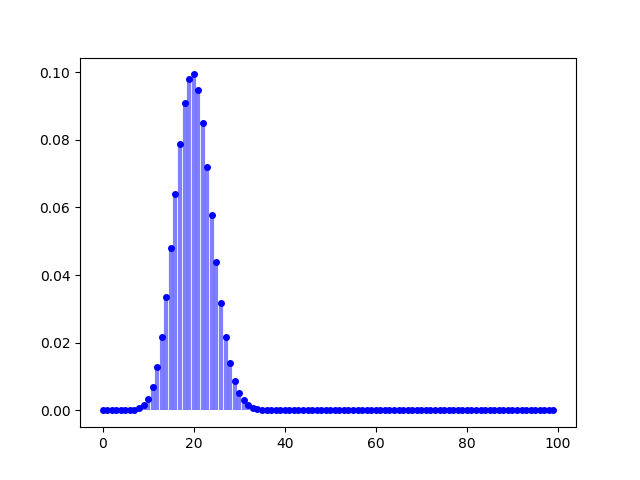

In [7]:
# let's be a bit more general

X = np.arange(0,100)
#or get x range from Percent point function (inverse of `cdf`)
#X = np.arange(binom.ppf(.001, n, p), binom.ppf(0.999, n, p))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, f_x(X), 'bo', ms=4)
ax.vlines(X, 0, f_x(X), colors='b', lw=3, alpha=0.5)

### Example question 4.8 from Haan

Three successes have occured on the first 5 trials of a Bernoulli process with p=0.4. What is the probability of 3 successes in the next 5 trials?


### Hypergeometric and the Binomial

The hypergeometric and binomial distributions have similiarities, and in fact the binomial may be used to approximate the hypergeometric if $n$, sample size, is small compared with $N$ (population). Let's evaluate an example where $n << N$:

<IPython.core.display.Javascript object>


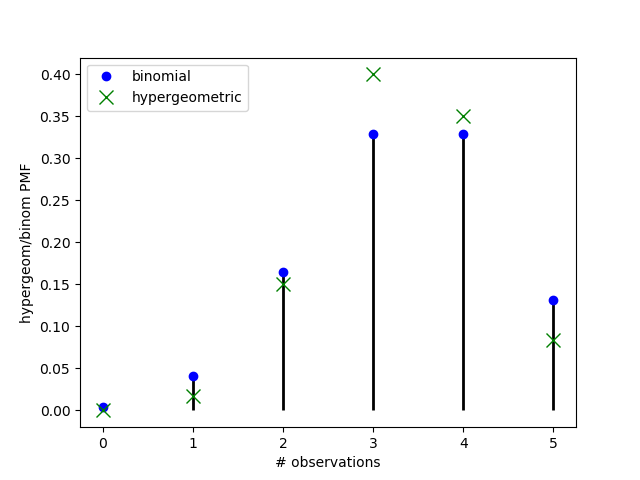

In [11]:
# Example 3.8 in compendium
N, n, k = 15, 5, 10.
p = k/N

f_binom = binom(n, p).pmf #with replacement
f_hypg = hypergeom(N, k, n).pmf #w/o replacement

fig = plt.figure()
ax = fig.add_subplot(111)
X = np.arange(0, 6)

ax.plot(X, f_binom(X), 'bo', label='binomial')
ax.vlines(X, 0, f_binom(X), lw=2)

ax.plot(X, f_hypg(X), 'gx', markersize=10, label='hypergeometric')
ax.set_xlabel('# observations')
ax.set_ylabel('hypergeom/binom PMF')
plt.legend()

This shows that replacement has a small effect when drawing a small sample from a large population. It's sometimes called the **"10%-rule"**.

## Poisson distribution

Consider a Bernoulli process defined over an interval of time (or space) so that $p$ is the probability that an event may occur during the time interval. If the time interval is allowed to become shorter and shorter so that the probability, $p$, of an event occurring in the interval gets smaller and smaller and the number of trials, $n$, increases in such as fashion that $np$ remains constant ($\lambda$), then the expected number of occurrence in any total time interval remains the same.

* This "compression" of the Bernoulli process interval yields a Poisson process, which is computationally simpler
* The Poisson distribution can be used to approximate the Binomial distribution
* Poisson events occur randomly, but at a constant average rate
* For example, the occurrence of storms in a particular geographic region over the course of a year can be modelled with the Poisson distribution


Assumptions for Poisson distribution | 
------------ |
1. An event may occur at any time or any point in space |
2.The occurrence(s) of an event in a given time (or space) interval is independent of that in any other nonoverlapping intervals |
3. The probability of occurrence of an event in a small interaval $\Delta t$ is proportional to $\Delta t$, and can be given by $\lambda=\gamma \Delta t$, where $\gamma$ is the mean rate of occurrence of the event (assumed constant); and the probability of two or more occurrences in $\Delta t$ is negligible.|


The $p.m.f.$ has the general form:

$$P(X=x) = f_x(x; \lambda) = {\lambda^x\over x!} e^{-\lambda} $$

Where $x$ is the event number and $\lambda$ is *mean occurrence rate* (sometimes also called *intensity*). 

The $E(X)$ is given by:

$$ E(X) = \lambda$$

and:

$$Var(X) = \lambda$$


In [12]:
# On average, 1.7 hurricanes make landfall in the US every year. What's the probability of no hurricanes in a year?
rate=1.7
x=0
rate**x/math.factorial(x)*np.exp(-rate)

0.18268352405273466

### Examples: Compendium examples 3.12 & 3.13

Calculate the probability that a 100-year flood will occur once in 20 years.

**Solution**

__Binomial__: $f_x(x; n, p) = f_x(1; 20, 0.01) = \binom{20}{1} \cdot 0.01^1 \cdot 0.99^{19} = 0.16$

__Poisson__: $f_x(x; \lambda) = f_x(1; 0.2) = 0.2^1 e^{-0.2} / 1! \approx 0.16$

Calculate the probability that a 2-year flood will occur five times in ten years.

__Binomial__: $f_x(x; n, p) = f_x(5; 10, 0.5) = \binom{10}{5} \cdot 0.5^5 \cdot 0.5^5 = 0.246$

__Poisson__: $f_x(x; \lambda) = f_x(5; 0.5) = 0.5^5 e^{-5} / 5! = 0.176$

In the latter case the probability $p$ is not sufficiently small, and $n$ is not larger. We need to use the true binomial distribution here.

## References / Notes

Concepts and Examples are based on

1. [Ang H-S.A., Tang W.H.; Probability Concepts in Engineering Planning and Design, Volume 1: Basic Principles](http://books.google.no/books/about/Probability_Concepts_in_Engineering_Plan.html?id=EIRRAAAAMAAJ&redir_esc=y)
2. Haan, C.; Statistical Methods in Hydrology 2nd. Edition. 
